In [49]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pylab as plt
import raytracing as rt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
def scan_2theta(deuxtheta_span, N,
                source_param, detector, detector_param):
    """
    Direct beam 2theta scan
    """
    I_measure = []
    for deuxtheta in deuxtheta_span:
 
        # Source
        A, u = rt.source(N, **source_param)

        # Detector
        if detector == 'plate':
            through_detect, uv_detec = rt.plate_collim_detector(A, u, deuxtheta,
                                                 **detector_param)
        else:
            through_detect, uv_detec = rt.slit_detector(A, u, deuxtheta,
                                                 **detector_param)

        detected = through_detect
        I = np.count_nonzero(detected)
        I_measure.append(I)

    I_measure = np.array(I_measure)

    return I_measure

# Calibration using direct beam measurement

In [3]:
# source
hybride_collim_params = {
    'width':1.5,
    'height':10,
    'divergence_z':.65/100,
    'divergence_y':1,
    'position':130
}

# Detectors
plate_collimator_params = {
    'distance':290, # mm, distance from gonio center to receving slit
    'offset':0, # mm, offset along Z
    'length':96, # mm
    'width':22,
    'height':20,
    'nbr_plates':39,
    'acceptance':0.27 # degree
}

slit_angle = 0.25
slit_conversion_distance = 90 # mm
slit_width = slit_conversion_distance*slit_angle *np.pi/180 # mm
    
slit_detector_params = {
    'distance':320, # mm, distance from gonio center to receving slit
    'offset':0, # mm, offset along Z
    'width':slit_width, # mm
    'height':20, # mm
}

## Detecteur fente

In [4]:
deuxtheta_range = 0.24

In [5]:
ls calib

2019_theta_2theta_LaB6_detecteurFente025.csv
direct_att90_fente1_2_200um.csv
direct_att90_fente1_2_40um.csv
direct_att90_fente1_32_200um.csv
direct_att90_fente1_4_100um.csv
direct_att90_fente1_8_100um.csv
FaisceauDirect__plateColim_deuxTheta_fente1000um_att90.csv
FaisceauDirect_plateColim_deuxTheta_fente200um_att90.csv
FaisceauDirect_plateColim_deuxTheta_fente500um_att90.csv
mesure_calib.ipynb


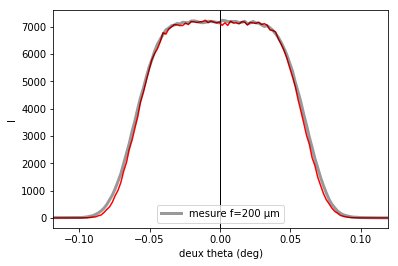

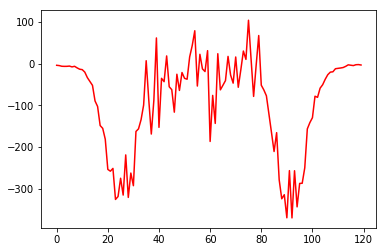

In [7]:
data = np.genfromtxt('calib/direct_att90_fente1_2_200um.csv',
                     skip_header=33, delimiter=',')
deux_theta_exp, Iexp = data[:, 0], data[:, 1]
offset  = np.trapz(deux_theta_exp * Iexp)/np.trapz(Iexp) # barycentre recentrage
deux_theta_exp = deux_theta_exp - offset

# Experiment
hybride_collim_params['width'] = 0.2

slit_angle = 0.5
slit_conversion_distance = 90 # mm
slit_width = slit_conversion_distance*slit_angle *np.pi/180 # mm
    
slit_detector_params = {
    'distance':380, # mm, distance from gonio center to receving slit
    'offset':0, # mm, offset along Z
    'width':slit_width, # mm
    'height':20, # mm
}


deuxtheta_range = 0.24

mask = np.abs(deux_theta_exp)<deuxtheta_range/2

deuxtheta_span = deux_theta_exp[mask]

I_measure = scan_2theta(deuxtheta_span, 10000,
                        hybride_collim_params, 'slit', slit_detector_params)

# Graph
deuxtheta_center = 0
plt.figure();
plt.axvline(x=deuxtheta_center, linewidth=1, color='black')
plt.plot(deuxtheta_span, I_measure, 'r');
plt.plot(deux_theta_exp, Iexp/Iexp.max()*I_measure.max(),
         'k', label='mesure f=200 µm', alpha=0.4, linewidth=3)
plt.xlabel('deux theta (deg)');
plt.ylabel('I'); plt.legend();
plt.xlim([deuxtheta_span.min(), deuxtheta_span.max()]);

plt.figure();
plt.plot(I_measure-Iexp[mask]/Iexp.max()*I_measure.max(), 'r');

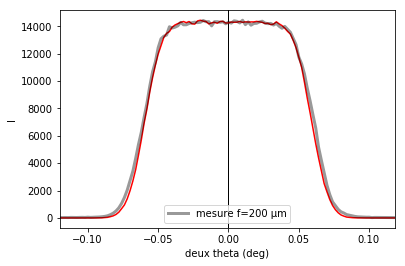

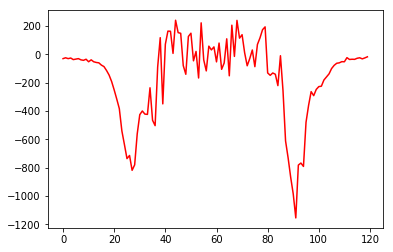

In [9]:
data = np.genfromtxt('calib/direct_att90_fente1_2_40um.csv',
                     skip_header=33, delimiter=',')
deux_theta_exp, Iexp = data[:, 0], data[:, 1]
offset  = np.trapz(deux_theta_exp * Iexp)/np.trapz(Iexp) # barycentre recentrage
deux_theta_exp = deux_theta_exp - offset

# Experiment
hybride_collim_params['width'] = 0.1

slit_angle = 1/2.0
slit_conversion_distance = 90 # mm
slit_width = slit_conversion_distance*slit_angle *np.pi/180 # mm
    
slit_detector_params = {
    'distance':380, # mm, distance from gonio center to receving slit
    'offset':0, # mm, offset along Z
    'width':slit_width, # mm
    'height':20, # mm
}

mask = np.abs(deux_theta_exp)<deuxtheta_range/2
deuxtheta_span = deux_theta_exp[mask]
I_measure = scan_2theta(deuxtheta_span, 20000,
                        hybride_collim_params, 'slit', slit_detector_params)

# Graph
plt.figure();
plt.axvline(x=deuxtheta_center, linewidth=1, color='black')
plt.plot(deuxtheta_span, I_measure, 'r');
plt.plot(deux_theta_exp, Iexp/Iexp.max()*I_measure.max(),
         'k', label='mesure f=200 µm', alpha=0.4, linewidth=3)
plt.xlabel('deux theta (deg)');
plt.ylabel('I'); plt.legend();
plt.xlim([deuxtheta_span.min(), deuxtheta_span.max()]);

plt.figure();
plt.plot(I_measure-Iexp[mask]/Iexp.max()*I_measure.max(), 'r');

# Detecteur plate colim

In [29]:
data = np.genfromtxt('calib/FaisceauDirect_plateColim_deuxTheta_fente200um_att90.csv',
                     skip_header=33, delimiter=',')
deux_theta_exp, Iexp_200um = data[:, 0], data[:, 1]

deux_theta_exp, Iexp = data[:, 0], data[:, 1]

In [47]:
# Experiment
hybride_collim_params['width'] = 0.2

plate_collimator_params = {
    'distance':360, # mm, distance from gonio center to receving slit
    'offset':-0.18, # mm, offset along Z
    'length':96, # mm, from spec.
    'width':22,
    'height':20,
    'nbr_plates':39,
    'acceptance':0.27 # degree, from spec.
}

deuxtheta_center = 0.
deuxtheta_range = 0.8

mask = np.abs(deux_theta_exp)<deuxtheta_range/2
deuxtheta_span = deux_theta_exp[mask]
I_measure = scan_2theta(deuxtheta_span, 20000,
                        hybride_collim_params, 'plate', plate_collimator_params)

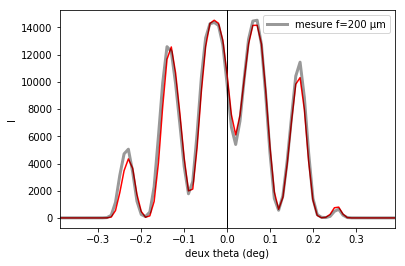

In [48]:
# Graph
plt.axvline(x=deuxtheta_center, linewidth=1, color='black')
plt.plot(deuxtheta_span, I_measure, 'r');
plt.plot(deux_theta_exp, Iexp_200um/Iexp_200um.max()*I_measure.max(),
         'k', label='mesure f=200 µm', alpha=0.4, linewidth=3)
plt.xlabel('deux theta (deg)');
plt.ylabel('I'); plt.legend();
plt.xlim([deuxtheta_span.min(), deuxtheta_span.max()]);

## Next

- Vertical calibration ? 
- lambda dispersion? --> Vegas/I or random sampling
- calibration with powder LaB6/ W?

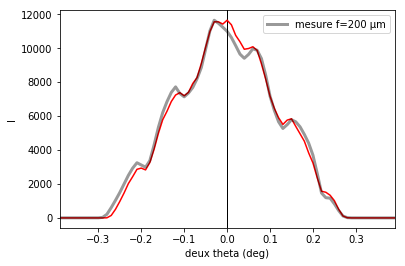

In [59]:
data = np.genfromtxt('calib/FaisceauDirect_plateColim_deuxTheta_fente500um_att90.csv',
                     skip_header=33, delimiter=',')
deux_theta_exp, Iexp_200um = data[:, 0], data[:, 1]

deux_theta_exp, Iexp = data[:, 0], data[:, 1]

# Experiment
hybride_collim_params['width'] = .5

plate_collimator_params = {
    'distance':360, # mm, distance from gonio center to receving slit
    'offset':-0.18, # mm, offset along Z
    'length':96, # mm, from spec.
    'width':22,
    'height':20,
    'nbr_plates':39,
    'acceptance':0.27 # degree, from spec.
}

deuxtheta_center = 0.
deuxtheta_range = 0.8

mask = np.abs(deux_theta_exp)<deuxtheta_range/2
deuxtheta_span = deux_theta_exp[mask]
I_measure = scan_2theta(deuxtheta_span, 20000,
                        hybride_collim_params, 'plate', plate_collimator_params)


# Graph
plt.axvline(x=deuxtheta_center, linewidth=1, color='black')
plt.plot(deuxtheta_span, I_measure, 'r');
plt.plot(deux_theta_exp, Iexp_200um/Iexp_200um.max()*I_measure.max(),
         'k', label='mesure f=200 µm', alpha=0.4, linewidth=3)
plt.xlabel('deux theta (deg)');
plt.ylabel('I'); plt.legend();
plt.xlim([deuxtheta_span.min(), deuxtheta_span.max()]);